In [2]:
import pandas as pd


#KDE with Seaborn
import seaborn as sns

In [3]:
Set1 = pd.read_csv('C:/Users/demet/Downloads/OneDrive_1_10-23-2023/Solar_flare_RHESSI_2004_05.csv')

In [4]:
Set1

,duration.s,peak.c/s,total.counts,energy.kev,x.pos.asec,y.pos.asec,radial,active.region.ar,flag.1,flag.2,...,flag.4,flag.5,dt.start,dt.peak,dt.end,year,month,day,energy.kev.i,energy.kev.f
0,196,592,644352.0,6-12,-966,-207,988,536,A0,DR,...,P1,Q2,2004-01-01 00:39:36,2004-01-01 00:40:06,2004-01-01 00:42:52,2004,1,1,6,12
1,588,592,1838208.0,6-12,-967,-200,987,536,A0,DR,...,Q1,NaN,2004-01-01 00:42:52,2004-01-01 00:43:34,2004-01-01 00:52:40,2004,1,1,6,12
2,712,1456,2815104.0,12-25,964,172,979,528,A0,P1,...,NaN,NaN,2004-01-01 01:06:56,2004-01-01 01:14:26,2004-01-01 01:18:48,2004,1,1,12,25
3,1096,3824,12128496.0,12-25,-972,-137,982,0,A0,DR,...,PE,Q2,2004-01-01 01:18:48,2004-01-01 01:29:22,2004-01-01 01:37:04,2004,1,1,12,25
4,452,200,476352.0,6-12,-978,-249,1009,536,A0,DR,...,P1,PE Q3,2004-01-01 02:21:20,2004-01-01 02:21:34,2004-01-01 02:28:52,2004,1,1,6,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17501,704,24,72312.0,6-12,-279,229,362,841,A0,DF,...,P1,Q2,2005-12-29 21:38:40,2005-12-29 21:39:50,2005-12-29 21:50:24,2005,12,29,6,12
17502,212,22,24624.0,6-12,-402,238,468,841,A0,DF,...,Q1,NaN,2005-12-29 22:07:16,2005-12-29 22:08:18,2005-12-29 22:10:48,2005,12,29,6,12
17503,584,184,332976.0,6-12,-251,243,350,843,A0,GD,...,GS,P1 PE Q4,2005-12-30 16:47:04,2005-12-30 16:50:02,2005-12-30 16:56:48,2005,12,30,6,12
17504,512,56,101424.0,6-12,-250,228,339,0,A0,P1,...,Q1,NaN,2005-12-30 20:18:20,2005-12-30 20:21:22,2005-12-30 20:26:52,2005,12,30,6,12


In [5]:
#Method 1 1 + 2 + 3 + 4
Set1_Method1_1234 = pd.read_csv('C:/Users/demet/Downloads/OneDrive_1_10-23-2023/Solar_flare_RHESSI_2004_05.csv', nrows = 3662, usecols = ['total.counts', 'x.pos.asec','y.pos.asec' ])

In [6]:
Set1_Method1_1234

,total.counts,x.pos.asec,y.pos.asec
0,644352.0,-966,-207
1,1838208.0,-967,-200
2,2815104.0,964,172
3,12128496.0,-972,-137
4,476352.0,-978,-249
...,...,...,...
3657,68832.0,533,365
3658,32520.0,681,-179
3659,7248.0,680,-191
3660,24552.0,696,-193


<Axes: xlabel='x.pos.asec', ylabel='y.pos.asec'>

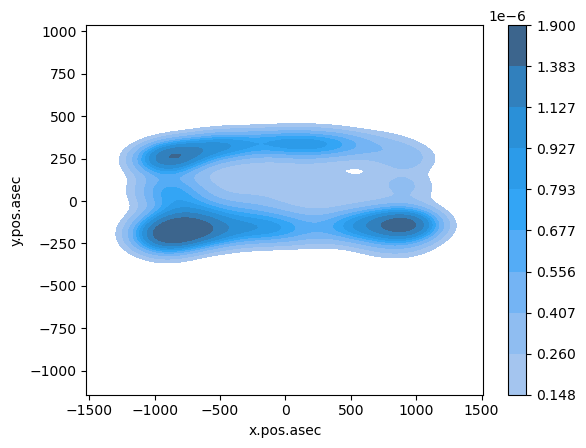

In [7]:
sns.kdeplot(data = Set1_Method1_1234, x = Set1_Method1_1234["x.pos.asec"], y = Set1_Method1_1234["y.pos.asec"], fill = True, thresh = 0.05, cbar = True)

In [9]:
i = pd.read_csv('C:/Users/demet/Downloads/OneDrive_1_10-23-2023/Solar_flare_RHESSI_2004_05.csv', nrows = 3662, usecols = ['energy.kev.i'])
f = pd.read_csv('C:/Users/demet/Downloads/OneDrive_1_10-23-2023/Solar_flare_RHESSI_2004_05.csv', nrows = 3662, usecols = ['energy.kev.f'])

In [14]:
#Subtracting
f.subtract(i, fill_value = 0)
iT = f.copy()
iT["energy.kev.f"] = f["energy.kev.f"] - i["energy.kev.i"]
iT

,energy.kev.f
0,6
1,6
2,13
3,13
4,6
...,...
3657,6
3658,6
3659,6
3660,6


In [17]:
#Method 2
Set1_Method2_1234 = pd.read_csv('C:/Users/demet/Downloads/OneDrive_1_10-23-2023/Solar_flare_RHESSI_2004_05.csv', nrows = 3662, usecols = ['energy.kev', 'duration.s', 'x.pos.asec','y.pos.asec', 'energy.kev.i', 'energy.kev.f' ])

In [18]:
Set1_Method2_1234

,duration.s,energy.kev,x.pos.asec,y.pos.asec,energy.kev.i,energy.kev.f
0,196,6-12,-966,-207,6,12
1,588,6-12,-967,-200,6,12
2,712,12-25,964,172,12,25
3,1096,12-25,-972,-137,12,25
4,452,6-12,-978,-249,6,12
...,...,...,...,...,...,...
3657,656,6-12,533,365,6,12
3658,292,6-12,681,-179,6,12
3659,116,6-12,680,-191,6,12
3660,244,6-12,696,-193,6,12


<Axes: xlabel='duration.s', ylabel='energy.kev.f'>

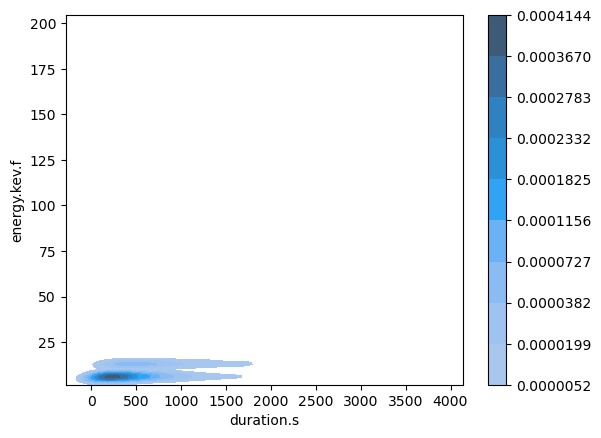

In [19]:

sns.kdeplot(data = Set1_Method2_1234, x = Set1_Method2_1234["duration.s"], y = iT["energy.kev.f"], fill = True, thresh = 0.05, cbar = True)

In [15]:
#Method 1 21 + 22 + 23 + 24
Set1_Method1_21_22_23_24 = pd.read_csv('C:/Users/demet/Downloads/OneDrive_1_10-23-2023/Solar_flare_RHESSI_2004_05.csv', skiprows = 15542, nrows = 1964, usecols = [0,3, 4,5])
Set1_Method1_21_22_23_24

,284,6-12,158,-213
0,2736,6-12,-218,-332
1,736,6-12,597,108
2,1076,12-25,631,113
3,264,6-12,133,355
4,388,6-12,88,-363
...,...,...,...,...
1959,704,6-12,-279,229
1960,212,6-12,-402,238
1961,584,6-12,-251,243
1962,512,6-12,-250,228


<Axes: xlabel='158', ylabel='-213'>

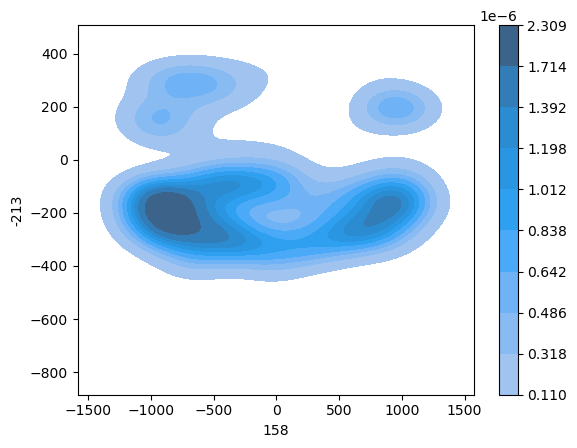

In [16]:

sns.kdeplot(data = Set1_Method1_21_22_23_24, x = Set1_Method1_21_22_23_24["158"], y = Set1_Method1_21_22_23_24["-213"], fill = True, thresh = 0.05, cbar = True)

In [31]:
i = pd.read_csv('C:/Users/demet/Downloads/OneDrive_1_10-23-2023/Solar_flare_RHESSI_2004_05.csv', skiprows = 15542, nrows = 1964, usecols = [19])
f = pd.read_csv('C:/Users/demet/Downloads/OneDrive_1_10-23-2023/Solar_flare_RHESSI_2004_05.csv', skiprows = 15542, nrows = 1964, usecols = [20])
i
#Subtracting
iT = f.copy()
iT["12"] = f["12"] - i["6"]
iT

,12
0,6
1,6
2,13
3,6
4,6
...,...
1959,6
1960,6
1961,6
1962,6


In [32]:
#Method 2 21 + 22 + 23 + 24
Set1_Method2_21_22_23_24 = pd.read_csv('C:/Users/demet/Downloads/OneDrive_1_10-23-2023/Solar_flare_RHESSI_2004_05.csv', skiprows = 15542, nrows = 1964, usecols = [0,4,5])
Set1_Method2_21_22_23_24

,284,158,-213
0,2736,-218,-332
1,736,597,108
2,1076,631,113
3,264,133,355
4,388,88,-363
...,...,...,...
1959,704,-279,229
1960,212,-402,238
1961,584,-251,243
1962,512,-250,228


<Axes: xlabel='284', ylabel='12'>

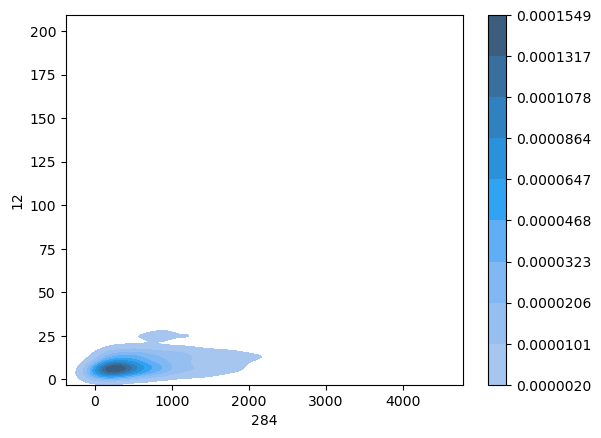

In [33]:
sns.kdeplot(data = Set1_Method2_21_22_23_24, x = Set1_Method2_21_22_23_24["284"], y = iT["12"], fill = True, thresh = 0.05, cbar = True)